##### This notebook calculates the difference between the linear theories and the depth-dependent theory
###### First, import packages:

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Output, Button, Checkbox,GridBox
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output, Javascript
from base64 import b64encode
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline
from utils import *

###### Make plots!

Used Lyakin as sf_crit in plots!!


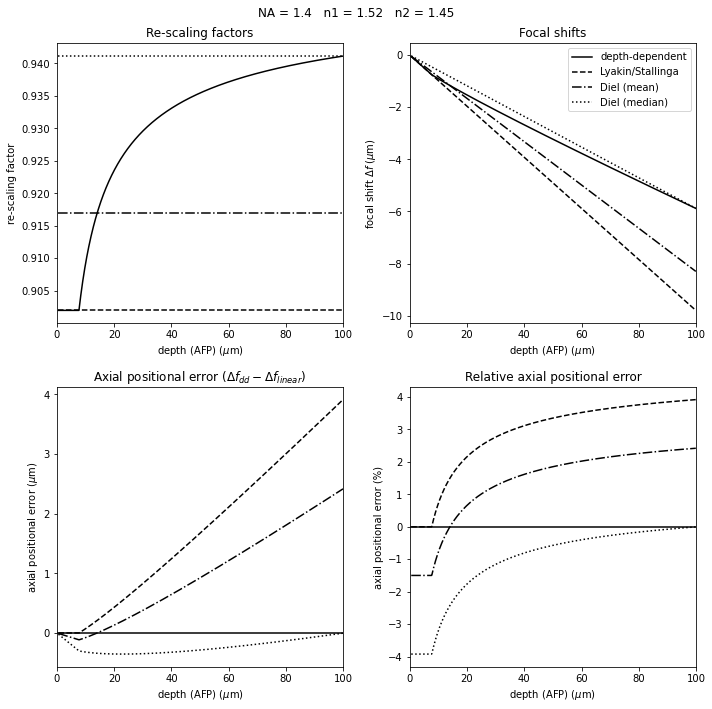

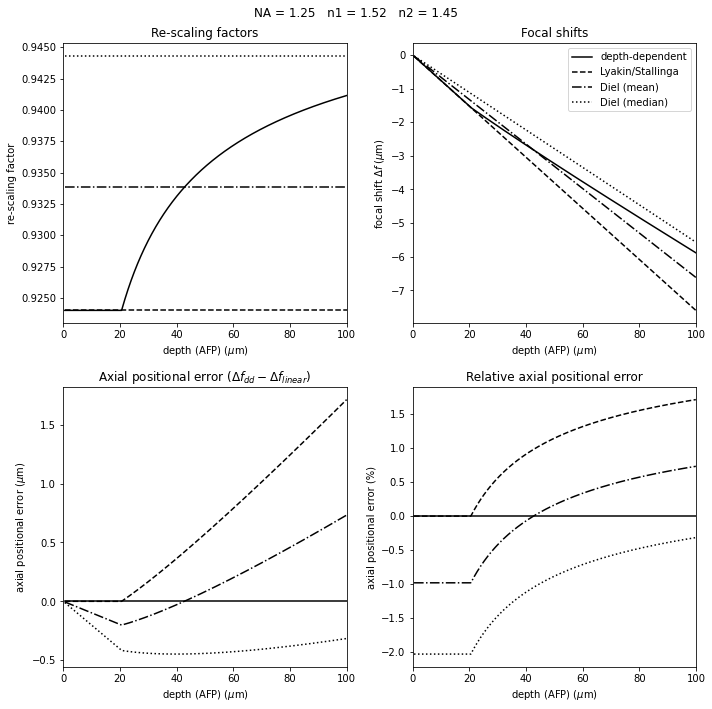

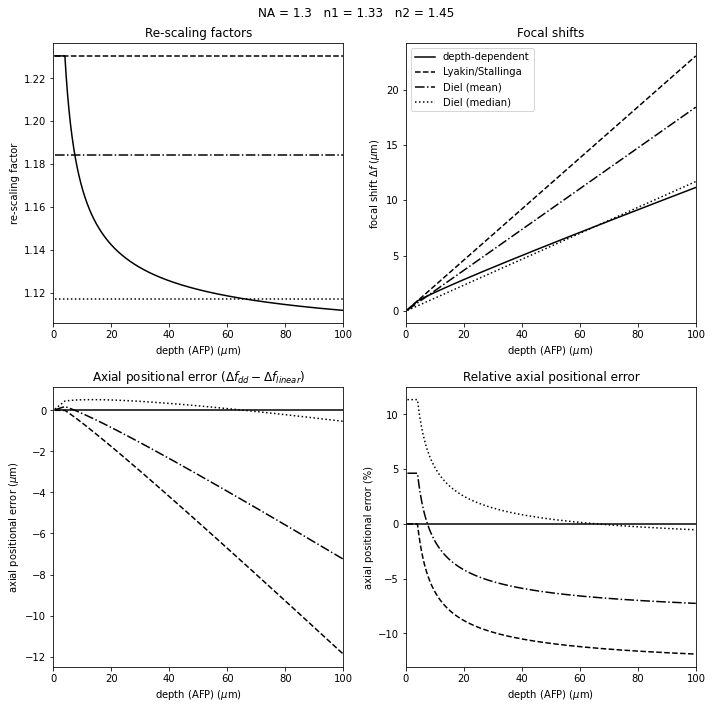

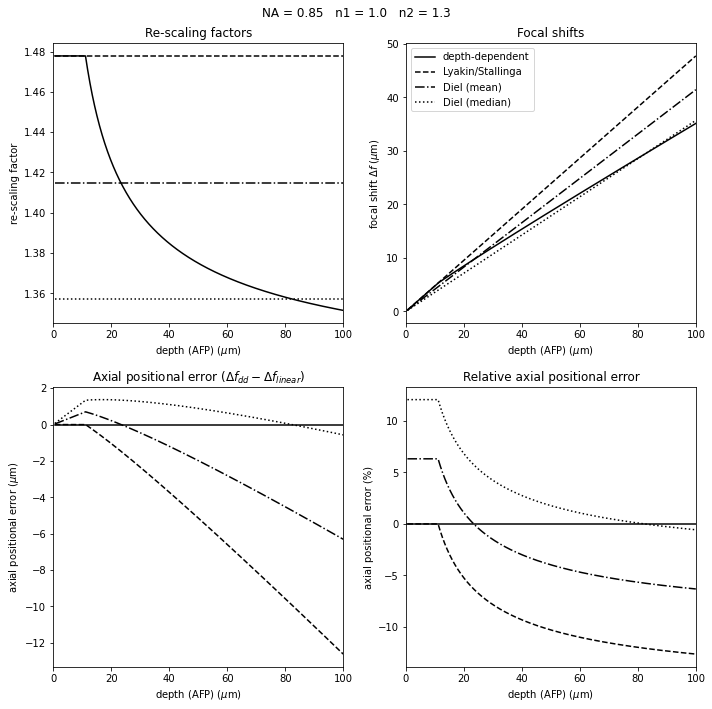

In [15]:
print("Used Lyakin as sf_crit in plots!!")

# define scenario's to calculate
NAs = [1.4, 1.25, 1.3, 0.85]
n1s = [1.52, 1.52, 1.33, 1.0]
n2s = [1.45, 1.45, 1.45, 1.3]

lam_0 = 0.52 #microns

#colors=['black','magenta','cyan','red']
colors = ['black','black','black','black']

for s in range(len(NAs)): # run over scenarios
    NA = NAs[s]
    n1 = n1s[s]
    n2 = n2s[s]
    
    #make figure
    fig,axs = plt.subplots(2,2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    #calculate re-scaling factors
    z_min,z_max = lam_0,100
    z = np.arange(z_min,z_max,0.1)
    sf=scaling_factor(z,NA,n1,n2,lam_0)
    sf_lyakin = Lyakin(z,n2,n1,NA)
    sf_diel_mean = diel_mean(z,n1,n2,NA)
    sf_diel_median = diel_median(z,n1,n2,NA)
    
    #plot rescaling factors vs depth (AFP)
    axs[0,0].set_title('Re-scaling factors')
    axs[0,0].plot(z,sf,c=colors[s])#,label='depth-dependent')
    axs[0,0].plot(z,sf_lyakin,c=colors[s],ls='--')#,label='Lyakin')
    axs[0,0].plot(z,sf_diel_mean,c=colors[s],ls='-.')#,label='Diel (mean)')
    axs[0,0].plot(z,sf_diel_median,c=colors[s],ls=':')#,label='Diel (median)')
    axs[0,0].set_ylabel('re-scaling factor')
    axs[0,0].set_xlabel(r'depth (AFP) ($\mu$m)')
    axs[0,0].set_xlim(0,z_max)
    
    #calculate focal shifts (sf/afp - afp) vs depth (AFP)
    real_focal_shift = np.multiply(sf,z) - z # based on a depth-dependent scaling factor
    focal_shift_lyakin = np.multiply(sf_lyakin,z) - z # based on a depth-dependent scaling factor
    focal_shift_diel_mean = np.multiply(sf_diel_mean,z) - z # based on a depth-dependent scaling factor
    focal_shift_diel_median = np.multiply(sf_diel_median,z) - z # based on a depth-dependent scaling factor
    
    #plot focal shifts
    axs[0,1].set_title('Focal shifts')
    axs[0,1].plot(z,real_focal_shift,c=colors[s],label='depth-dependent')
    axs[0,1].plot(z,focal_shift_lyakin,c=colors[s],ls='--',label='Lyakin/Stallinga')
    axs[0,1].plot(z,focal_shift_diel_mean,c=colors[s],ls='-.',label='Diel (mean)')
    axs[0,1].plot(z,focal_shift_diel_median,c=colors[s],ls=':',label='Diel (median)')
    axs[0,1].set_ylabel(r'focal shift $\Delta f$ ($\mu$m)')
    axs[0,1].set_xlabel(r'depth (AFP) ($\mu$m)')
    axs[0,1].set_xlim(0,z_max)

    #calculated re-scaling error linear theories vs depth-dependent ones
    error_sf_abs = real_focal_shift - real_focal_shift
    error_lyakin_abs = real_focal_shift - focal_shift_lyakin
    error_diel_mean_abs = real_focal_shift - focal_shift_diel_mean
    error_diel_median_abs = real_focal_shift - focal_shift_diel_median
    
    #plot errors:
    axs[1,0].plot(z,error_sf_abs,c=colors[s])#,label='depth-dependent')
    axs[1,0].plot(z,error_lyakin_abs,c=colors[s],ls='--')#,label='Lyakin')
    axs[1,0].plot(z,error_diel_mean_abs,c=colors[s],ls='-.')#,label='Diel (mean)')
    axs[1,0].plot(z,error_diel_median_abs,c=colors[s],ls=':')#,label='Diel (median)')    
    axs[1,0].set_title(r'Axial positional error ($\Delta f_{dd}-\Delta f_{linear}$)')
    axs[1,0].set_ylabel(r'axial positional error ($\mu$m)')
    axs[1,0].set_xlabel(r'depth (AFP) ($\mu$m)')
    axs[1,0].set_xlim(0,z_max)
    
    #calculate relative errors (fs_dd - fs_lin) / depth (afp):
    error_sf = np.divide(real_focal_shift - real_focal_shift,z)*100
    error_lyakin = np.divide(real_focal_shift - focal_shift_lyakin,z)*100
    error_diel_mean = np.divide(real_focal_shift - focal_shift_diel_mean,z)*100
    error_diel_median = np.divide(real_focal_shift - focal_shift_diel_median,z)*100
    
    #plot relative errors
    axs[1,1].plot(z,error_sf,c=colors[s],label='depth-dependent')
    axs[1,1].plot(z,error_lyakin,c=colors[s],ls='--',label='Lyakin/Stallinga')
    axs[1,1].plot(z,error_diel_mean,c=colors[s],ls='-.',label='Diel (mean)')
    axs[1,1].plot(z,error_diel_median,c=colors[s],ls=':',label='Diel (median)')    
    axs[1,1].set_title('Relative axial positional error')
    axs[1,1].set_ylabel('axial positional error (%)')
    axs[1,1].set_xlabel(r'depth (AFP) ($\mu$m)')
    axs[0,1].legend()
    axs[1,1].set_xlim(0,z_max)
    
    #finish plot
    fig.suptitle('NA = '+ str(NA) + '   n1 = ' + str(n1) + '   n2 = ' + str(n2))
    plt.tight_layout()
    plt.show()
    print('\n')